# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [1]:
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt
##if you need any imports you can do that here. 

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


We shared recordings.zip, please unzip those. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Spoken digit/recordings.zip'

Archive:  /content/drive/MyDrive/Spoken digit/recordings.zip
   creating: recordings/
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/0_jackson_25.wav  
  inflating: recordings/0_jackson_26.wav  
  inflating: recordings/0_jackson_27.wav  
  inflating: r

In [4]:
files=os.listdir('recordings')

In [5]:
print(files[0])

8_yweweler_15.wav


In [6]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
all_files=[]
for i in files:
  filepath='recordings/'+str(i)
  all_files.append(filepath)

In [7]:
print(all_files[0])

recordings/8_yweweler_15.wav


<font size=4>Grader function 1 </font>

In [8]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [9]:
label=all_files[0].split('/')[1].split('_')[0]
print(all_files[0],label)

recordings/8_yweweler_15.wav 8


In [10]:
labels=[]
for i in all_files:
  label=i.split('/')[1].split('_')[0]
  labels.append(int(label))

In [11]:
labels[0]

8

## Exploring the sound dataset

In [12]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

## Creating dataframe

In [13]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
df_audio=pd.DataFrame()
df_audio['path']=all_files
df_audio['label']=labels

In [14]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [15]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [16]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],stratify=df_audio['label'],random_state=45,test_size=0.3)

<font size=4>Grader function 3 </font>

In [19]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [20]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [21]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
tr_data=[]
te_data=[]
for i in X_train:
  l=load_wav(i)
  tr_data.append(l)
for i in X_test:
  l=load_wav(i)
  te_data.append(l)  

In [22]:
samples_tr=[]
samples_te=[]
duration_tr=[]
duration_te=[]
for i in tr_data:
  samples_tr.append(i[0])
  duration_tr.append(i[1])
for i in te_data:
  samples_te.append(i[0])
  duration_te.append(i[1])
X_train_processed=pd.DataFrame()
X_test_processed=pd.DataFrame()
X_train_processed['raw_data']=samples_tr
X_train_processed['duration']=duration_tr
X_test_processed['raw_data']=samples_te
X_test_processed['duration']=duration_te

In [23]:
X_train_processed.head()

,raw_data,duration
0,"[-0.0043981485, -0.0019107949, 0.00079161633, ...",0.704898
1,"[-0.008860776, -0.01059996, -0.010873296, -0.0...",0.682268
2,"[0.00087281835, 0.0004117749, -2.936911e-05, -...",0.327755
3,"[-0.00891809, -0.009839113, -0.009143287, -0.0...",0.344127
4,"[0.0006233836, 0.0006708935, 0.0006798584, 0.0...",0.567891


(array([548., 728., 107.,  15.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.14353741, 0.35746032, 0.57138322, 0.78530612, 0.99922902,
        1.21315193, 1.42707483, 1.64099773, 1.85492063, 2.06884354,
        2.28276644]),
 <a list of 10 Patch objects>)

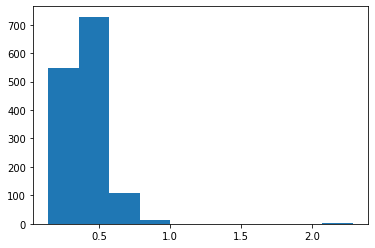

In [24]:
#plot the histogram of the duration for trian
plt.hist((X_train_processed['duration']))

In [25]:
#plot the histogram of the duration for trian


In [26]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,101,10):
  print('{} th percentile is'.format(i),np.percentile(X_train_processed['duration'].values,i))

0 th percentile is 0.1435374149659864
10 th percentile is 0.25955102040816325
20 th percentile is 0.2996371882086168
30 th percentile is 0.33215419501133786
40 th percentile is 0.3595827664399093
50 th percentile is 0.391156462585034
60 th percentile is 0.41863945578231293
70 th percentile is 0.44769160997732427
80 th percentile is 0.48358276643990933
90 th percentile is 0.5538775510204081
100 th percentile is 2.282766439909297


In [27]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101,1):
  print('{} th percentile is'.format(i),np.percentile(X_train_processed['duration'].values,i))

90 th percentile is 0.5538775510204081
91 th percentile is 0.5680585034013608
92 th percentile is 0.5830403628117916
93 th percentile is 0.6025904761904762
94 th percentile is 0.6175700680272107
95 th percentile is 0.6330226757369615
96 th percentile is 0.6432308390022674
97 th percentile is 0.6655478458049886
98 th percentile is 0.7050403628117913
99 th percentile is 0.79601179138322
100 th percentile is 2.282766439909297


<font size=4>Grader function 4 </font>

In [28]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [29]:
max_length  = 17640

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
X_train_pad_seq=pad_sequences(X_train_processed['raw_data'],maxlen=max_length,padding='post',truncating='post',dtype='float')
X_test_pad_seq=pad_sequences(X_test_processed['raw_data'],maxlen=max_length,padding='post',truncating='post',dtype='float')
print(X_train_pad_seq.shape,X_test_pad_seq.shape)
## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

(1400, 17640) (600, 17640)


In [32]:
print(X_train_processed['raw_data'][0])
print(X_train_pad_seq[0])

[-0.00439815 -0.00191079  0.00079162 ... -0.00413    -0.00245533
  0.        ]
[-0.00439815 -0.00191079  0.00079162 ...  0.          0.
  0.        ]


In [33]:
X_train_mask=[]
X_test_mask=[]
for seq in X_train_pad_seq:
  seq_mask = [(i!=0) for i in seq]
  X_train_mask.append(seq_mask)
X_train_mask=np.array(X_train_mask)
for seq in X_test_pad_seq:
  seq_mask = [(i!=0) for i in seq]
  X_test_mask.append(seq_mask)
X_train_mask=np.array(X_train_mask)
X_test_mask=np.array(X_test_mask)
print(X_train_mask.shape)  
print(X_test_mask.shape)  

(1400, 17640)
(600, 17640)


<font size=4>Grader function 5 </font>

In [34]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [42]:
from tensorflow.keras.layers import Input, LSTM, Dense,LeakyReLU,GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow as tf

In [36]:
print(X_train_mask.dtype
,X_train_pad_seq.dtype)

bool float64


In [59]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool
input_layer=Input(shape=(max_length,1),dtype='float32')
mask_input_layer=Input(shape=max_length,dtype='bool')
lstm=LSTM(32)(input_layer,mask=mask_input_layer)
dense1=Dense(32)(lstm)
act=LeakyReLU()(dense1)
output=Dense(10,activation='softmax')(act)
model1=Model(inputs=[input_layer,mask_input_layer],outputs=output)
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 17640, 1)]   0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 32)           4352        ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 dense_10 (Dense)               (None, 32)           1056        ['lstm_5[0][0]']           

In [37]:
from sklearn.metrics import f1_score
class Metrics(tf.keras.callbacks.Callback):
  def __init__(self,validation_data):
    super().__init__()
    self.x_test=validation_data[0]
    self.y_test=validation_data[1]

  def on_epoch_end(self,epoch,logs={}):
    val_predict=(np.asarray(self.model.predict(self.x_test)))
    val_label=np.argmax(val_predict,axis=1)
    val_targ=self.y_test
    val_microF1=f1_score(val_targ,val_label,average='micro')
    print('val_microF1 :',val_microF1)  

In [60]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint
def scheduler(epoch,lr):
  if epoch%2==1:
    lr=0.9*lr
  return lr  
callbacks=[LearningRateScheduler(scheduler),ModelCheckpoint(filepath='best_model1.h5',monitor='val_microF1',mode='max',save_best_only=True,save_weights_only=True),Metrics(([X_test_pad_seq,X_test_mask],y_test))]

In [62]:
#train your model
model1.fit([X_train_pad_seq,X_train_mask],y_train,
           epochs=50,
           validation_data=([X_test_pad_seq,X_test_mask],y_test),callbacks=callbacks)

Epoch 1/50
44/44 [==============================] - ETA: 0s - loss: 2.3090 - accuracy: 0.0850WARNING:tensorflow:Can save best model only with val_microF1 available, skipping.


val_microF1 : 0.10000000000000002
44/44 [==============================] - 36s 655ms/step - loss: 2.3090 - accuracy: 0.0850 - val_loss: 2.3085 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 2/50
44/44 [==============================] - ETA: 0s - loss: 2.3060 - accuracy: 0.0857WARNING:tensorflow:Can save best model only with val_microF1 available, skipping.


val_microF1 : 0.10000000000000002
44/44 [==============================] - 27s 624ms/step - loss: 2.3060 - accuracy: 0.0857 - val_loss: 2.3043 - val_accuracy: 0.1000 - lr: 0.0090
Epoch 3/50
44/44 [==============================] - ETA: 0s - loss: 2.3063 - accuracy: 0.0971WARNING:tensorflow:Can save best model only with val_microF1 available, skipping.


val_microF1 : 0.09833333333333333
44/44 [==============================] - 26s 598ms/step - loss: 2.3063 - accuracy: 0.0971 - val_loss: 2.3029 - val_accuracy: 0.0983 - lr: 0.0090
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.0900WARNING:tensorflow:Can save best model only with val_microF1 available, skipping.


val_microF1 : 0.10000000000000002
44/44 [==============================] - 27s 621ms/step - loss: 2.3048 - accuracy: 0.0900 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0081
Epoch 5/50
18/44 [===========>..................] - ETA: 11s - loss: 2.3040 - accuracy: 0.1111

KeyboardInterrupt: ignored

In [63]:
model1.save_weights('/content/drive/MyDrive/Spoken digit/model1.h5')

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [39]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [40]:
X_train_spectrogram=[]
X_test_spectrogram=[]
for i in X_train_pad_seq:
  spectrum=convert_to_spectrogram(i)
  X_train_spectrogram.append(spectrum)
for i in X_test_pad_seq:
  spectrum=convert_to_spectrogram(i)
  X_test_spectrogram.append(spectrum)    

In [41]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram=np.array(X_train_spectrogram)
X_test_spectrogram=np.array(X_test_spectrogram)
print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

(1400, 64, 35)
(600, 64, 35)


<font size=4>Grader function 6 </font>

In [71]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [74]:
# write the architecture of the model
input=Input(shape=(64,35))
lstm=LSTM(25,return_sequences=True)(input)
avg=tf.reduce_mean(lstm, axis=-1)
dense=Dense(32)(avg)
act=LeakyReLU()(dense)
output=Dense(10,activation='softmax')(act)
model2=Model(inputs=input,outputs=output)
model2.summary()
#print model.summary and make sure that it is following point 2 mentioned above

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 35)]          0         
                                                                 
 lstm_19 (LSTM)              (None, 64, 25)            6100      
                                                                 
 tf.math.reduce_mean_7 (TFOp  (None, 64)               0         
 Lambda)                                                         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                          

In [76]:
#compile and fit your model.LearningRateScheduler(scheduler),
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0008),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callbacks=[Metrics((X_test_spectrogram,y_test)),ModelCheckpoint(filepath='best_model2.h5',monitor='val_microF1',mode='max',save_best_only=True,save_weights_only=True)]
model2.fit(X_train_spectrogram,y_train,epochs=25,validation_data=(X_test_spectrogram,y_test),callbacks=callbacks)

Epoch 1/25
39/44 [=========================>....] - ETA: 0s - loss: 0.8321 - accuracy: 0.7284val_microF1 : 0.7283333333333334


44/44 [==============================] - 5s 50ms/step - loss: 0.8284 - accuracy: 0.7321 - val_loss: 0.8391 - val_accuracy: 0.7283
Epoch 2/25
40/44 [==========================>...] - ETA: 0s - loss: 0.7891 - accuracy: 0.7523val_microF1 : 0.7166666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.7861 - accuracy: 0.7557 - val_loss: 0.8105 - val_accuracy: 0.7167
Epoch 3/25
41/44 [==========================>...] - ETA: 0s - loss: 0.7699 - accuracy: 0.7569val_microF1 : 0.7416666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.7637 - accuracy: 0.7586 - val_loss: 0.7700 - val_accuracy: 0.7417
Epoch 4/25
40/44 [==========================>...] - ETA: 0s - loss: 0.7538 - accuracy: 0.7570val_microF1 : 0.7483333333333333


44/44 [==============================] - 0s 10ms/step - loss: 0.7548 - accuracy: 0.7550 - val_loss: 0.7572 - val_accuracy: 0.7483
Epoch 5/25
41/44 [==========================>...] - ETA: 0s - loss: 0.7392 - accuracy: 0.7652val_microF1 : 0.7366666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.7409 - accuracy: 0.7650 - val_loss: 0.7560 - val_accuracy: 0.7367
Epoch 6/25
40/44 [==========================>...] - ETA: 0s - loss: 0.7158 - accuracy: 0.7750val_microF1 : 0.7483333333333333


44/44 [==============================] - 0s 10ms/step - loss: 0.7119 - accuracy: 0.7800 - val_loss: 0.7432 - val_accuracy: 0.7483
Epoch 7/25
41/44 [==========================>...] - ETA: 0s - loss: 0.7158 - accuracy: 0.7713val_microF1 : 0.7666666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.7096 - accuracy: 0.7714 - val_loss: 0.7068 - val_accuracy: 0.7667
Epoch 8/25
41/44 [==========================>...] - ETA: 0s - loss: 0.6929 - accuracy: 0.7790val_microF1 : 0.7666666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.7800 - val_loss: 0.6900 - val_accuracy: 0.7667
Epoch 9/25
39/44 [=========================>....] - ETA: 0s - loss: 0.6599 - accuracy: 0.7812val_microF1 : 0.78


44/44 [==============================] - 0s 9ms/step - loss: 0.6557 - accuracy: 0.7857 - val_loss: 0.6737 - val_accuracy: 0.7800
Epoch 10/25
37/44 [========================>.....] - ETA: 0s - loss: 0.6499 - accuracy: 0.7922val_microF1 : 0.7583333333333333


44/44 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.7943 - val_loss: 0.6665 - val_accuracy: 0.7583
Epoch 11/25
41/44 [==========================>...] - ETA: 0s - loss: 0.6351 - accuracy: 0.7957val_microF1 : 0.79


44/44 [==============================] - 0s 10ms/step - loss: 0.6315 - accuracy: 0.8007 - val_loss: 0.6325 - val_accuracy: 0.7900
Epoch 12/25
41/44 [==========================>...] - ETA: 0s - loss: 0.6044 - accuracy: 0.8095val_microF1 : 0.7633333333333333


44/44 [==============================] - 0s 9ms/step - loss: 0.6047 - accuracy: 0.8093 - val_loss: 0.6393 - val_accuracy: 0.7633
Epoch 13/25
41/44 [==========================>...] - ETA: 0s - loss: 0.6029 - accuracy: 0.8011val_microF1 : 0.7966666666666665


44/44 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.8029 - val_loss: 0.6230 - val_accuracy: 0.7967
Epoch 14/25
39/44 [=========================>....] - ETA: 0s - loss: 0.5810 - accuracy: 0.8189val_microF1 : 0.7966666666666665


44/44 [==============================] - 0s 9ms/step - loss: 0.5857 - accuracy: 0.8164 - val_loss: 0.5931 - val_accuracy: 0.7967
Epoch 15/25
41/44 [==========================>...] - ETA: 0s - loss: 0.5668 - accuracy: 0.8255val_microF1 : 0.795


44/44 [==============================] - 0s 9ms/step - loss: 0.5648 - accuracy: 0.8257 - val_loss: 0.5959 - val_accuracy: 0.7950
Epoch 16/25
39/44 [=========================>....] - ETA: 0s - loss: 0.5695 - accuracy: 0.8197val_microF1 : 0.8033333333333333


44/44 [==============================] - 0s 9ms/step - loss: 0.5662 - accuracy: 0.8221 - val_loss: 0.6046 - val_accuracy: 0.8033
Epoch 17/25
42/44 [===========================>..] - ETA: 0s - loss: 0.5666 - accuracy: 0.8058val_microF1 : 0.8083333333333333


44/44 [==============================] - 0s 9ms/step - loss: 0.5585 - accuracy: 0.8121 - val_loss: 0.5685 - val_accuracy: 0.8083
Epoch 18/25
42/44 [===========================>..] - ETA: 0s - loss: 0.5481 - accuracy: 0.8281val_microF1 : 0.7933333333333333


44/44 [==============================] - 0s 10ms/step - loss: 0.5484 - accuracy: 0.8279 - val_loss: 0.5696 - val_accuracy: 0.7933
Epoch 19/25
40/44 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.8250val_microF1 : 0.8233333333333334


44/44 [==============================] - 0s 10ms/step - loss: 0.5393 - accuracy: 0.8257 - val_loss: 0.5385 - val_accuracy: 0.8233
Epoch 20/25
44/44 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.8264val_microF1 : 0.8233333333333334


44/44 [==============================] - 0s 9ms/step - loss: 0.5238 - accuracy: 0.8264 - val_loss: 0.5433 - val_accuracy: 0.8233
Epoch 21/25
44/44 [==============================] - ETA: 0s - loss: 0.5030 - accuracy: 0.8364val_microF1 : 0.7983333333333333


44/44 [==============================] - 1s 11ms/step - loss: 0.5030 - accuracy: 0.8364 - val_loss: 0.5670 - val_accuracy: 0.7983
Epoch 22/25
43/44 [============================>.] - ETA: 0s - loss: 0.5084 - accuracy: 0.8401val_microF1 : 0.825


44/44 [==============================] - 0s 9ms/step - loss: 0.5070 - accuracy: 0.8407 - val_loss: 0.5148 - val_accuracy: 0.8250
Epoch 23/25
44/44 [==============================] - ETA: 0s - loss: 0.4889 - accuracy: 0.8436val_microF1 : 0.8216666666666665


44/44 [==============================] - 0s 9ms/step - loss: 0.4889 - accuracy: 0.8436 - val_loss: 0.5099 - val_accuracy: 0.8217
Epoch 24/25
41/44 [==========================>...] - ETA: 0s - loss: 0.4740 - accuracy: 0.8590val_microF1 : 0.8133333333333334


44/44 [==============================] - 0s 10ms/step - loss: 0.4714 - accuracy: 0.8593 - val_loss: 0.5205 - val_accuracy: 0.8133
Epoch 25/25
44/44 [==============================] - ETA: 0s - loss: 0.4691 - accuracy: 0.8500val_microF1 : 0.8366666666666667


44/44 [==============================] - 0s 9ms/step - loss: 0.4691 - accuracy: 0.8500 - val_loss: 0.5069 - val_accuracy: 0.8367


In [77]:
model2.save_weights('/content/drive/MyDrive/Spoken digit/model2.h5')

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [78]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [79]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [84]:
print(len(aug_temp))

9


## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [92]:
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

In [93]:
augmented_train_data=[]
for i in X_train:
  a=generate_augmented_data(i)
  augmented_train_data.extend(a)
y_train=np.repeat(y_train,9)

In [94]:
print(len(augmented_train_data),len(y_train))

14400 14400


In [98]:
X_test_preprocess=[]
for i in X_test:
  l=load_wav(i)
  X_test_preprocess.append(l[0])
print(len(X_test_preprocess))  

400


In [99]:
X_train_pad_seq=pad_sequences(augmented_train_data,maxlen=max_length,padding='post',truncating='post',dtype='float')
X_test_pad_seq=pad_sequences(X_test_preprocess,maxlen=max_length,padding='post',truncating='post',dtype='float')
print(X_train_pad_seq.shape,X_test_pad_seq.shape)

(14400, 17640) (400, 17640)


In [100]:
X_train_mask=[]
X_test_mask=[]
for seq in X_train_pad_seq:
  seq_mask = [(i!=0) for i in seq]
  X_train_mask.append(seq_mask)
X_train_mask=np.array(X_train_mask)
for seq in X_test_pad_seq:
  seq_mask = [(i!=0) for i in seq]
  X_test_mask.append(seq_mask)
X_train_mask=np.array(X_train_mask)
X_test_mask=np.array(X_test_mask)
print(X_train_mask.shape)  
print(X_test_mask.shape)  

(14400, 17640)
(400, 17640)


3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [102]:
input_layer=Input(shape=(max_length,1),dtype='float32')
mask_input_layer=Input(shape=max_length,dtype='bool')
lstm=LSTM(64)(input_layer,mask=mask_input_layer)
dense1=Dense(32)(lstm)
act=LeakyReLU()(dense1)
output=Dense(10,activation='softmax')(act)
model3=Model(inputs=[input_layer,mask_input_layer],outputs=output)
model3.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 17640, 1)]   0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 17640)]      0           []                               
                                                                                                  
 lstm_21 (LSTM)                 (None, 64)           16896       ['input_19[0][0]',               
                                                                  'input_20[0][0]']               
                                                                                                  
 dense_26 (Dense)               (None, 32)           2080        ['lstm_21[0][0]']         

In [105]:
model3.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callbacks=[LearningRateScheduler(scheduler),ModelCheckpoint(filepath='best_model3.h5',monitor='val_microF1',mode='max',save_best_only=True,save_weights_only=True),Metrics(([X_test_pad_seq,X_test_mask],y_test))]
model3.fit([X_train_pad_seq,X_train_mask],y_train,
           epochs=50,
           validation_data=([X_test_pad_seq,X_test_mask],y_test),callbacks=callbacks)

Epoch 1/50
450/450 [==============================] - ETA: 0s - loss: 2.3209 - accuracy: 0.0995WARNING:tensorflow:Can save best model only with val_microF1 available, skipping.


val_microF1 : 0.1125
450/450 [==============================] - 251s 546ms/step - loss: 2.3209 - accuracy: 0.0995 - val_loss: 2.2980 - val_accuracy: 0.1125 - lr: 0.0100
Epoch 2/50
 22/450 [>.............................] - ETA: 3:45 - loss: 2.3073 - accuracy: 0.0980

KeyboardInterrupt: ignored

In [106]:
model3.save_weights('/content/drive/MyDrive/Spoken digit/model3.h5')

### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [107]:
X_train_spectrogram=[]
X_test_spectrogram=[]
for i in X_train_pad_seq:
  spectrum=convert_to_spectrogram(i)
  X_train_spectrogram.append(spectrum)
for i in X_test_pad_seq:
  spectrum=convert_to_spectrogram(i)
  X_test_spectrogram.append(spectrum)
X_train_spectrogram=np.array(X_train_spectrogram)
X_test_spectrogram=np.array(X_test_spectrogram)
print(X_train_spectrogram.shape,X_test_spectrogram.shape)  

(14400, 64, 35) (400, 64, 35)


In [108]:
input=Input(shape=(64,35))
lstm=LSTM(25,return_sequences=True)(input)
avg=tf.reduce_mean(lstm, axis=-1)
dense=Dense(32)(avg)
act=LeakyReLU()(dense)
output=Dense(10,activation='softmax')(act)
model4=Model(inputs=input,outputs=output)
model4.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 64, 35)]          0         
                                                                 
 lstm_22 (LSTM)              (None, 64, 25)            6100      
                                                                 
 tf.math.reduce_mean_8 (TFOp  (None, 64)               0         
 Lambda)                                                         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                          

In [109]:
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callbacks=[Metrics((X_test_spectrogram,y_test)),ModelCheckpoint(filepath='best_model4.h5',monitor='val_microF1',mode='max',save_best_only=True,save_weights_only=True)]
model4.fit(X_train_spectrogram,y_train,epochs=25,validation_data=(X_test_spectrogram,y_test),callbacks=callbacks)

Epoch 1/25
443/450 [============================>.] - ETA: 0s - loss: 1.8156 - accuracy: 0.3553val_microF1 : 0.6


450/450 [==============================] - 6s 7ms/step - loss: 1.8070 - accuracy: 0.3592 - val_loss: 1.1697 - val_accuracy: 0.6000
Epoch 2/25
450/450 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.6369val_microF1 : 0.7425


450/450 [==============================] - 2s 5ms/step - loss: 1.0411 - accuracy: 0.6369 - val_loss: 0.7768 - val_accuracy: 0.7425
Epoch 3/25
446/450 [============================>.] - ETA: 0s - loss: 0.8020 - accuracy: 0.7150val_microF1 : 0.8375


450/450 [==============================] - 2s 5ms/step - loss: 0.8000 - accuracy: 0.7160 - val_loss: 0.5731 - val_accuracy: 0.8375
Epoch 4/25
444/450 [============================>.] - ETA: 0s - loss: 0.6745 - accuracy: 0.7651val_microF1 : 0.865


450/450 [==============================] - 2s 5ms/step - loss: 0.6741 - accuracy: 0.7647 - val_loss: 0.5273 - val_accuracy: 0.8650
Epoch 5/25
449/450 [============================>.] - ETA: 0s - loss: 0.6022 - accuracy: 0.7900val_microF1 : 0.8575


450/450 [==============================] - 2s 5ms/step - loss: 0.6021 - accuracy: 0.7899 - val_loss: 0.4803 - val_accuracy: 0.8575
Epoch 6/25
447/450 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.8077val_microF1 : 0.87


450/450 [==============================] - 3s 6ms/step - loss: 0.5601 - accuracy: 0.8071 - val_loss: 0.4157 - val_accuracy: 0.8700
Epoch 7/25
450/450 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.8217val_microF1 : 0.8675


450/450 [==============================] - 4s 9ms/step - loss: 0.5233 - accuracy: 0.8217 - val_loss: 0.3915 - val_accuracy: 0.8675
Epoch 8/25
445/450 [============================>.] - ETA: 0s - loss: 0.4883 - accuracy: 0.8322val_microF1 : 0.9025


450/450 [==============================] - 3s 7ms/step - loss: 0.4884 - accuracy: 0.8322 - val_loss: 0.3593 - val_accuracy: 0.9025
Epoch 9/25
444/450 [============================>.] - ETA: 0s - loss: 0.4761 - accuracy: 0.8359val_microF1 : 0.8825


450/450 [==============================] - 2s 5ms/step - loss: 0.4760 - accuracy: 0.8361 - val_loss: 0.3491 - val_accuracy: 0.8825
Epoch 10/25
309/450 [===================>..........] - ETA: 0s - loss: 0.4546 - accuracy: 0.8415

KeyboardInterrupt: ignored

In [110]:
model4.save_weights('/content/drive/MyDrive/Spoken digit/model4.h5')